In [23]:
#下載mnist資料集
from keras.datasets import mnist
(train_feature, train_label), \
    (test_feature, test_label) = mnist.load_data()

In [24]:
#讀取資料集
from keras.datasets import mnist
(train_feature, train_label), (test_feature, test_label) = mnist.load_data()

In [25]:
#訓練資料是由單色數字圖片(images)和數字圖片真實值(labels)所組成，兩者都是60000筆，可以使用len()函式查看資料的長度
print(len(train_feature), len(train_label)) #查看資料長度

#每一筆單色的數字圖片是一個28*28的圖片檔，真實值是一個0~9的數字，可以使用shape屬性查看其維度
print(train_feature.shape,train_label.shape) #60000張28*28的數字圖片，和60000個數字圖片真實值(又稱標籤)

60000 60000
(60000, 28, 28) (60000,)


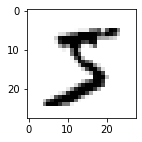

In [26]:
#顯示訓練資料的圖片與值
import matplotlib.pyplot as plt
def show_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2,2) #數字圖片大小
    plt.imshow(image, cmap='binary') #黑白灰階顯示
    plt.show()

show_image(train_feature[0])

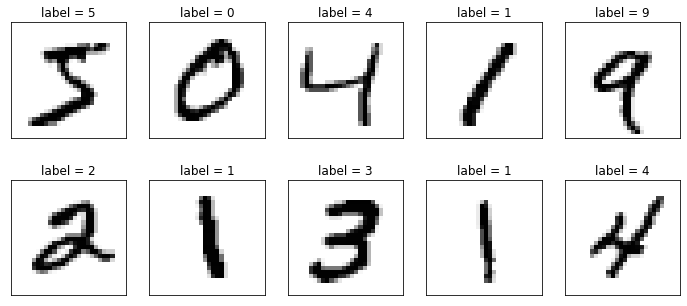

In [8]:
#查看多筆訓練資料
def show_images_labels_predictions(images, labels, predictions, start_id,num=10):
    plt.gcf().set_size_inches(12,14)
    if num>25: num=25
    for i in range(num):
        ax=plt.subplot(5,5, i+1)
        #顯示黑白圖片
        ax.imshow(images[start_id], cmap='binary')

        #有AI預測結果資料，才在標題顯示預測結果
        if(len(predictions)>0):
            title = 'ai = ' + str(predictions[i])
            #預測正確顯示(o), 錯誤顯示(x)
            title += ('(o)' if predictions[i]==labels[i] else '(x)')
            title += '\nlabel = ' + str(labels[i])
        
        #沒有AI預測結果資料，只在標題顯示真實數值
        else:
            title = 'label = ' + str(labels[i])
        
        #X, Y軸不顯示刻度
        ax.set_title(title, fontsize=12)
        ax.set_xticks([]); ax.set_yticks([])
        start_id+=1
    plt.show()
    
show_images_labels_predictions(train_feature, train_label, [], 0, 10)   

In [27]:
'''
●Feature資料預處理
Feature(數字圖片特徵值)就是模型中輸入神經元輸入的資料，每一個Mnist數字圖片都是一張28*28的二維向量圖片，必須轉換為784個float數字的一維向量，並將float數字標準化，當作輸入神經元的輸入，才能增加模型訓練的效率。因此總共需要784個輸入。
'''
#image轉換

#1. 以reshape()函式將28*28的數字圖片轉換為784個數字的一維向量，再以astype將每個數字都轉換為float數字。
train_feature_vector = train_feature.reshape(len(train_feature),784).astype('float32')
test_feature_vector = test_feature.reshape(len(test_feature), 784).astype('float32')

#2. 以shape屬性查看，數字圖片已轉換為784個數字的一維向量。
print(train_feature_vector.shape, test_feature_vector.shape)

(60000, 784) (10000, 784)


In [19]:
#3. 以print(train_feature_vector[0])顯示第1筆image資料內容，可看到資料是0~255的浮點數，這些數字就是圖片中每一個點的灰階值，如下：
print(train_feature_vector[0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
   0. 

In [28]:
#image標準化

#1. 將0~255的數字，除以255得到0~1之間浮點數，稱為標準化(Normalize)，標準化之後可以提高模型預測的準確度，增加訓練效率。
train_feature_normalize = train_feature_vector/255
test_feature_normalize = test_feature_vector/255

#2. 顯示第1筆image正規化的資料內容，可看到資料是0~1的浮點數。
print(train_feature_normalize[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [29]:
'''
●Label資料預處理
Label(數字圖片真實值)原本是0~9的數字，為了增加模型效率，神經元輸出比較常採用One-Hot Encoding編碼(一位有效編碼)的方式，輸出的所有位元中只有1個是1，其餘都是0。使用np_utils.to_categorical方法可以將數字轉換成One-Hot Encoding編碼。
'''

#1. 首先顯示Label真實值，方便前後對照。例如：訓練資料Label的前5筆。
print(train_label[0:5])

[5 0 4 1 9]


In [46]:
#2. 以from keras.utils import np_utils匯入模組，以to_categorical方法轉換。
from keras.utils import to_categorical

train_label_onehot = to_categorical(train_label)
test_label_onehot = to_categorical(test_label)

#3. 顯示Label轉換後的One-Hot Encoding編碼。如下：
print(train_label_onehot[0:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [41]:
'''
●訓練與預測
多層感知器的重點在訓練與預測。
1. 訓練(Train)：
Mnist資料集共有60000筆訓練資料，將訓練資料的Feature(數字圖片特徵值)和Label(數字真實值)都先經過預處理，作為多層感知器的輸入、輸出，然後進行模型訓練。
2. 預測(Predict):
模型訓練完成以後就可以用來作預測，將要預測的數字圖片，先經過預處理變成Feature(數字圖片特徵值)，就可送給模型作預測，得到0~9數字的預測結果。

也可以將訓練好的模型儲存起來，以後就可以不再重複訓練，如果要在其他程式中使用，只要載入儲存的模型就可以進行預測。
'''

'\n●訓練與預測\n多層感知器的重點在訓練與預測。\n1. 訓練(Train)：\nMnist資料集共有60000筆訓練資料，將訓練資料的Feature(數字圖片特徵值)和Label(數字真實值)都先經過預處理，作為多層感知器的輸入、輸出，然後進行模型訓練。\n2. 預測(Predict):\n模型訓練完成以後就可以用來作預測，將要預測的數字圖片，先經過預處理變成Feature(數字圖片特徵值)，就可送給模型作預測，得到0~9數字的預測結果。\n\n也可以將訓練好的模型儲存起來，以後就可以不再重複訓練，如果要在其他程式中使用，只要載入儲存的模型就可以進行預測。\n'

In [42]:
#建立模型
#1. 建立Sequential模型：匯入Sequential模組後即可以Sequential建立模型。
from tensorflow.keras.models import Sequential
model = Sequential()

In [43]:
#2. 建立輸入層和隱藏層：以add方法可以增加輸入層和隱藏層，Dense為上下層緊密連結的神經網路層。
#參數units=256代表隱藏層神經元數目有256個、input_dim=784代表輸入層神經元數目有784個，kernel_initializer='normal'代表使用常態分佈的亂數，初始化權重(weight)和偏置(bias)，activatio='relu'代表使用激勵函式為relu。

from tensorflow.keras.layers import Dense
model.add(Dense(units=256,
                input_dim=784,
                kernel_initializer='normal',
                activation='relu'))

In [44]:
#3. 建立輸出層
#參數units=10代表輸出層神經元數目有10個，輸入層不需要設定，它會自動連結上一層的輸入層的256個神經元，使用常態分佈的亂數初始化權重(weight和偏置(bias)，激勵函式為softmax。

model.add(Dense(units=10,
                kernel_initializer='normal',
                activation ='softmax'))

In [45]:
#訓練模型
#1. 設定模型的訓練方式：訓練中必須以compile方法定義Loss損失函式、Optimizer最佳化方法和metrics評估準確率方法，Keras提供許多內建的方法，可以當作訓練參數。
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

'''
●loss='categorical_crossentropy'：設定損失函式為categorical_crossentropy
●optimizer='adam'：設定最優化方法為adam。
●metrics=['accuracy']：設定評估模型方式為accuracy準確率。
'''

"\n●loss='categorical_crossentropy'：設定損失函式為categorical_crossentropy\n●optimizer='adam'：設定最優化方法為adam。\n●metrics=['accuracy']：設定評估模型方式為accuracy準確率。\n"

In [47]:
'''
2. 進行訓練：fit方法可以進行訓練，訓練時必須設定訓練資料和標籤。語法如下：
model.fit(x=特徵值, y=標籤, validation_split = 驗證資料百分比,
          epochs=訓練次數，batch_size=每批次有多少筆，verbose = n)

x,y = 設定訓練特徵值和標籤，這兩個參數是必須的。
validation_split :設定驗證資料百分比，例如0.2表示將訓練資料保留20%當作驗證資料。省略時將不保留驗證資料，全部資料都會作訓練用。
epochs：訓練次數，省略時只訓練一次。
batch_size：設定每批次讀取多少筆資料。
verbose：設定是否顯示訓練過程，0不顯示、1詳細顯示、2簡易顯示。
'''
train_history = model.fit(x=train_feature_normalize,
                          y=train_label_onehot, validation_split=0.2,
                          epochs=10, batch_size=200,verbose=2)
'''
以(train_feature_normalize,train_label_onehot)為訓練特徵值和標籤，訓練資料保留20%作驗證，也就是說會友0.8*60000=48000筆資料作為訓練資料、0.2*60000=12000筆資料作為驗證資料。訓練10數，每批次讀取200筆資料，顯示簡易的訓練過程。
'''

Epoch 1/10
240/240 - 3s - loss: 0.4416 - accuracy: 0.8812 - val_loss: 0.2195 - val_accuracy: 0.9388
Epoch 2/10
240/240 - 1s - loss: 0.1902 - accuracy: 0.9456 - val_loss: 0.1577 - val_accuracy: 0.9566
Epoch 3/10
240/240 - 1s - loss: 0.1344 - accuracy: 0.9613 - val_loss: 0.1241 - val_accuracy: 0.9637
Epoch 4/10
240/240 - 1s - loss: 0.1009 - accuracy: 0.9711 - val_loss: 0.1147 - val_accuracy: 0.9654
Epoch 5/10
240/240 - 1s - loss: 0.0809 - accuracy: 0.9773 - val_loss: 0.1024 - val_accuracy: 0.9689
Epoch 6/10
240/240 - 1s - loss: 0.0655 - accuracy: 0.9813 - val_loss: 0.0936 - val_accuracy: 0.9728
Epoch 7/10
240/240 - 1s - loss: 0.0546 - accuracy: 0.9850 - val_loss: 0.0910 - val_accuracy: 0.9726
Epoch 8/10
240/240 - 1s - loss: 0.0449 - accuracy: 0.9880 - val_loss: 0.0823 - val_accuracy: 0.9760
Epoch 9/10
240/240 - 1s - loss: 0.0380 - accuracy: 0.9896 - val_loss: 0.0810 - val_accuracy: 0.9762
Epoch 10/10
240/240 - 1s - loss: 0.0306 - accuracy: 0.9923 - val_loss: 0.0790 - val_accuracy: 0.9760

'\n以(train_feature_normalize,train_label_onehot)為訓練特徵值和標籤，訓練資料保留20%作驗證，也就是說會友0.8*60000=48000筆資料作為訓練資料、0.2*60000=12000筆資料作為驗證資料。訓練10數，每批次讀取200筆資料，顯示簡易的訓練過程。\n'

In [ ]:
'''
loss：使用訓練資料，得到的損失函式誤差值(值越小代表準確率越高)。
acc：使用訓練資料，得到的評估準確率(值在0~1，越大代表準確率越高)。
val_loss：使用驗證資料，得到的損失函式誤差值(越小代表準確率越高)。
val_acc：使用驗證資料，得到的評估準確率(值在0~1，越大代表準確率越高)。
'''

In [48]:
'''
●評估準確率
evaluate方法可以評估模型的損失函式誤差值和準確率，它會傳回串列，第0個元素為損失函式誤差值，第1個元素為準確率。
例如：使用測試資料評估模型的準確率。
'''
scores = model.evaluate(test_feature_normalize, test_label_onehot)
print('\n準確率=', scores[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0692 - accuracy: 0.9784

準確率= 0.9783999919891357


C:\Users\User\anaconda3\envs\python3.6\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


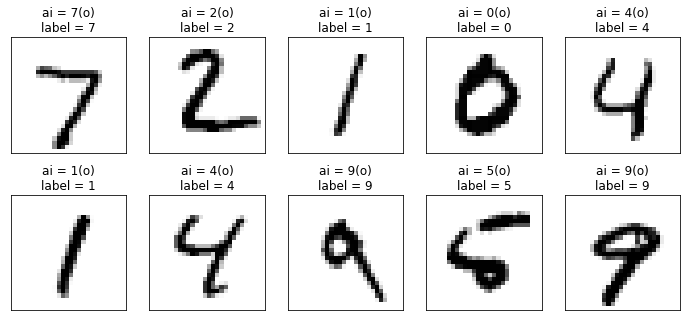

In [50]:
'''
●進行預測
訓練好的模型，就可以用predict_classes方法進行預測，本例是以測試資料將其特徵值標準化後的test_feature_normalize作預測。
'''
prediction=model.predict_classes(test_feature_normalize)

#顯示訓練好的模型對Mnist資料集前10筆預測的結果
show_images_labels_predictions(test_feature,test_label,prediction,0)

In [52]:
'''
●模型儲存和載入
儲存模型之後就不需要重新訓練，其他程式要預測時只要載入儲存的模型即可。
#刪除模型：del model
'''
#Keras使用HDF5檔案系統來儲存模型，模型儲存一般使用.h5為副檔名
model.save('Mnist_mlp_model.h5')

In [55]:
#載入模型：當訓練資料很龐大時，訓練一次可能需要很長的時間，這時就可以直接載入已訓練好的模型作為預測，減少重複訓練的時間。
from tensorflow.keras.models import load_model
model = load_model('Mnist_mlp_model.h5')